# Preprocessing

In [2]:
import numpy as np
import pandas as pd


In [3]:
data=pd.read_csv(r"/content/Mart_Sales.csv")

In [4]:
data.head(5)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
data.shape

(8523, 12)

In [7]:
data.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Handling missing values

Before doing anything, find out where the "missing" in the data are

In [8]:
data.isnull().sum()


,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


okay now we found number of missing values

- <b> features to be removed ---> 80%  is nan
- <b> features to filled --------> less than 80 %
- <b> observation to be removed --> less than 3%

In [9]:

missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)


Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


In [10]:
item_weight_mean = data['Item_Weight'].mean()
data['Item_Weight'] = data['Item_Weight'].fillna(item_weight_mean)
outlet_size_mode = data['Outlet_Size'].mode()[0]
data['Outlet_Size'] = data['Outlet_Size'].fillna(outlet_size_mode)



In [11]:
data.isnull().sum()


,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [12]:
data.duplicated().sum()


np.int64(0)

# Handling outliers

know we will check for the outliers and we will trys 2 ways.

how the boxplot visualize
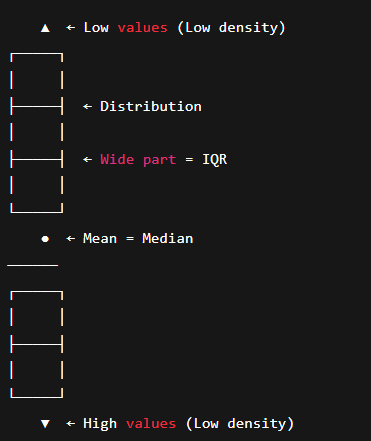

/tmp/ipython-input-699006577.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=col, palette="Set2")
/tmp/ipython-input-699006577.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=col, palette="Set2")
/tmp/ipython-input-699006577.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=col, palette="Set2")
/tmp/ipython-input-699006577.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for th

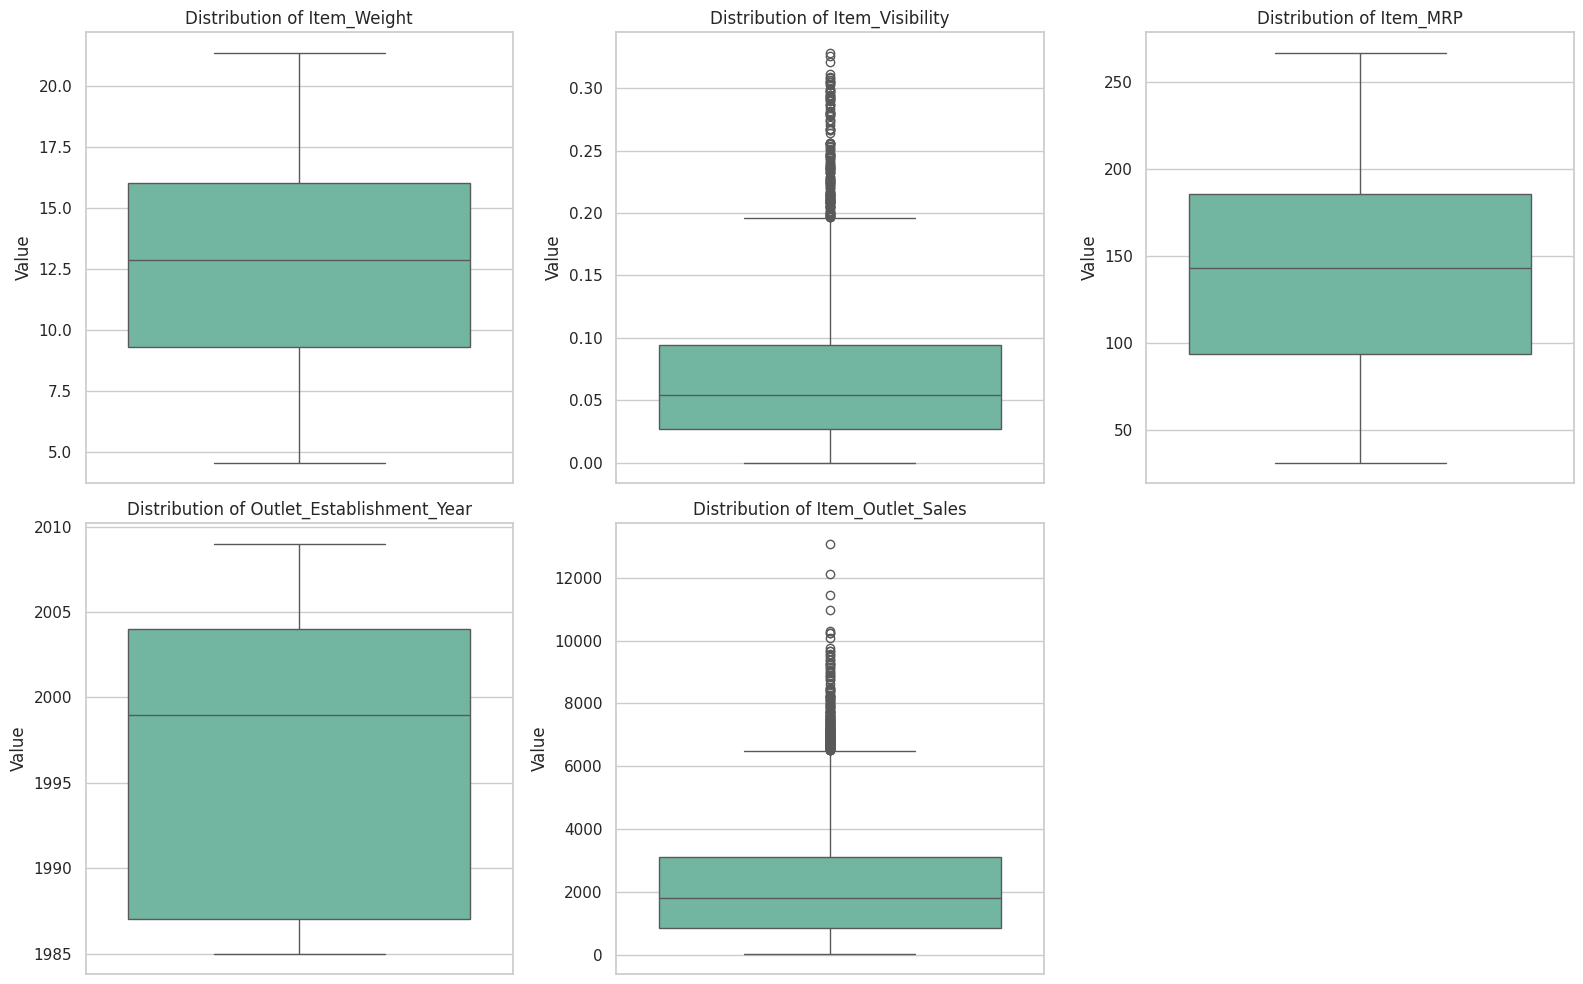

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_columns = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data, y=col, palette="Set2")
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.ylabel('Value')
plt.tight_layout()

In [14]:

numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP',
                     'Outlet_Establishment_Year', 'Item_Outlet_Sales']
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    print(f"{col}")
    print(f"Number of outliers: {len(outliers)}")



Item_Weight
Number of outliers: 0
Item_Visibility
Number of outliers: 144
Item_MRP
Number of outliers: 0
Outlet_Establishment_Year
Number of outliers: 0
Item_Outlet_Sales
Number of outliers: 186


now you will see 2 columns with outliers and we will try to handle oultiers in those 2 columns

In [19]:
Q1_vis = data['Item_Visibility'].quantile(0.25)
Q3_vis = data['Item_Visibility'].quantile(0.75)
IQR_vis = Q3_vis - Q1_vis
upper_vis = Q3_vis + 1.5 * IQR_vis
lower_vis = Q1_vis - 1.5 * IQR_vis

data['Item_Visibility'] = data['Item_Visibility'].clip(lower_vis, upper_vis)
print("Item_Visibility cleaned using capping method")
Q1_sales = data['Item_Outlet_Sales'].quantile(0.25)
Q3_sales = data['Item_Outlet_Sales'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales
upper_sales = Q3_sales + 1.5 * IQR_sales
lower_sales = Q1_sales - 1.5 * IQR_sales
data= data[(data['Item_Outlet_Sales'] >= lower_sales) & (data['Item_Outlet_Sales'] <= upper_sales)]
print("final data ship ",data.shape)


Item_Visibility cleaned using capping method
final data ship  (8290, 12)


# Skewness Handling


In [20]:
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP',
                     'Outlet_Establishment_Year', 'Item_Outlet_Sales']
skewness_values = data[numerical_columns].skew()
print("Skewness of numeric features:")
print(skewness_values)


Skewness of numeric features:
Item_Weight                  0.089990
Item_Visibility              0.810610
Item_MRP                     0.155328
Outlet_Establishment_Year   -0.419212
Item_Outlet_Sales            0.743737
dtype: float64


In [21]:
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP',
                     'Outlet_Establishment_Year', 'Item_Outlet_Sales']
skewness = data[numerical_columns].skew()
skewed_features = skewness[abs(skewness) > 1].index.tolist()
if len(skewed_features) == 0:
    print("No features found with |skewness| > 1. No transformation applied.")
else:
    for col in skewed_features:
        data[col] = np.log1p(data[col])
        print(f"Log transformation applied to: {col}")
print("\nFinal Skewness of numeric features:")
print(data[numerical_columns].skew())


No features found with |skewness| > 1. No transformation applied.

Final Skewness of numeric features:
Item_Weight                  0.089990
Item_Visibility              0.810610
Item_MRP                     0.155328
Outlet_Establishment_Year   -0.419212
Item_Outlet_Sales            0.743737
dtype: float64


# Encoding Categorical columns

In [23]:
from sklearn.preprocessing import LabelEncoder
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})
le = LabelEncoder()
categorical_cols = [
    'Item_Identifier', 'Item_Fat_Content', 'Item_Type',
    'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'
]

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
